This notebook uses images from relabeling dataset. Preprocessing and augmentation include:

1.   Resize: Stretch to 640x640
2.   Tile: 10 rows x 10 columns
3.   Modify Classes: 0 remapped, 45 dropped(Only contains NRMM related classes )
4.   Filter Null: Require at least 85% of images to contain annotations.

5.   Outputs per training example: 4
6.   Flip: Horizontal, Vertical
7.   Grayscale: Apply to 50% of images

Train/Test Split:


*   Training set: 29k 78%
*   Validation set: 5.5k 15%
*   Training set: 2.8k 8%




##1.Initialization

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 24.4/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

##2. Data Downloading

*   in data.yaml (content/-NRMM-3/data.yaml)file, the path of data need to be exact paths:
  *   test: /content/-NRMM-3/test/images
  *   train: /content/-NRMM-3/train/images
  *   val: /content/-NRMM-3/valid/images



In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AXtvn8E5cqIPHd94QNpU")
project = rf.workspace("university-college-london-pmvix").project("nrmm")
dataset = project.version(3).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=a23e20f330fd6af20447a0879a21f43ae9573cb070b4b484eb6e8940846df6f2
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Su

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to -NRMM-3 in yolov8:: 100%|██████████| 6369/6369 [00:00<00:00, 7774.22it/s]


##3. Model Training

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/-NRMM-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, ops

/content


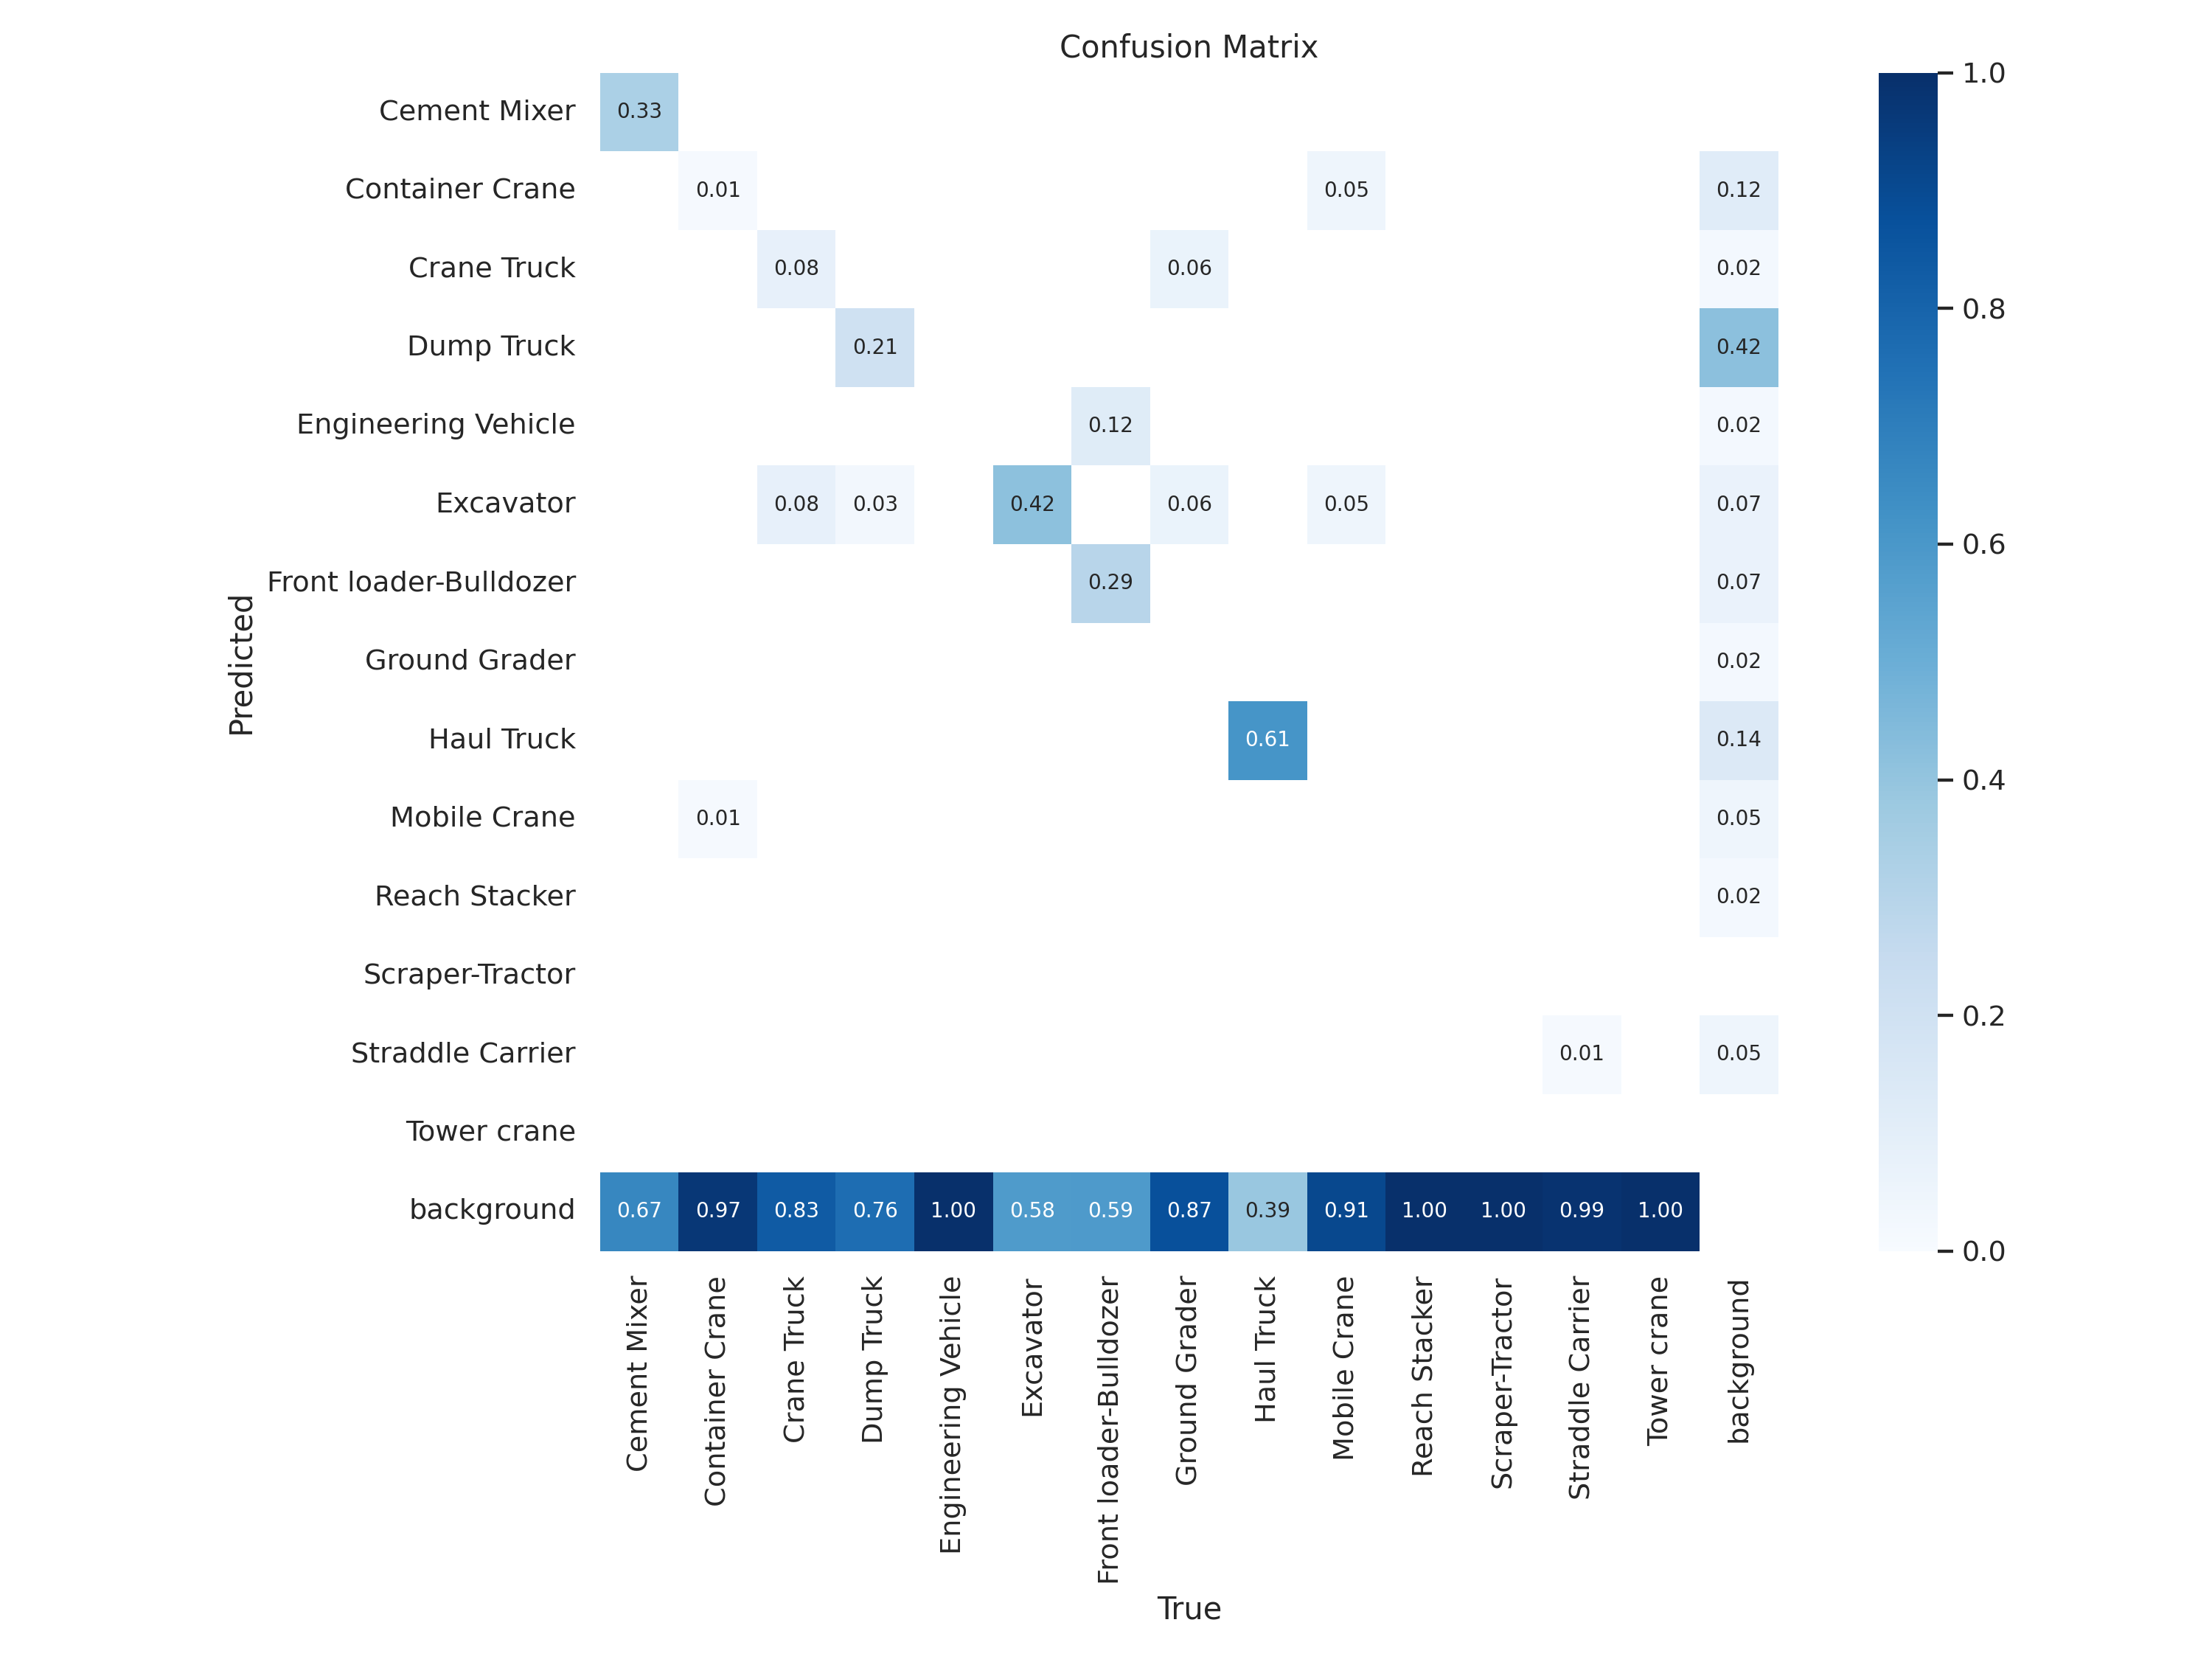

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


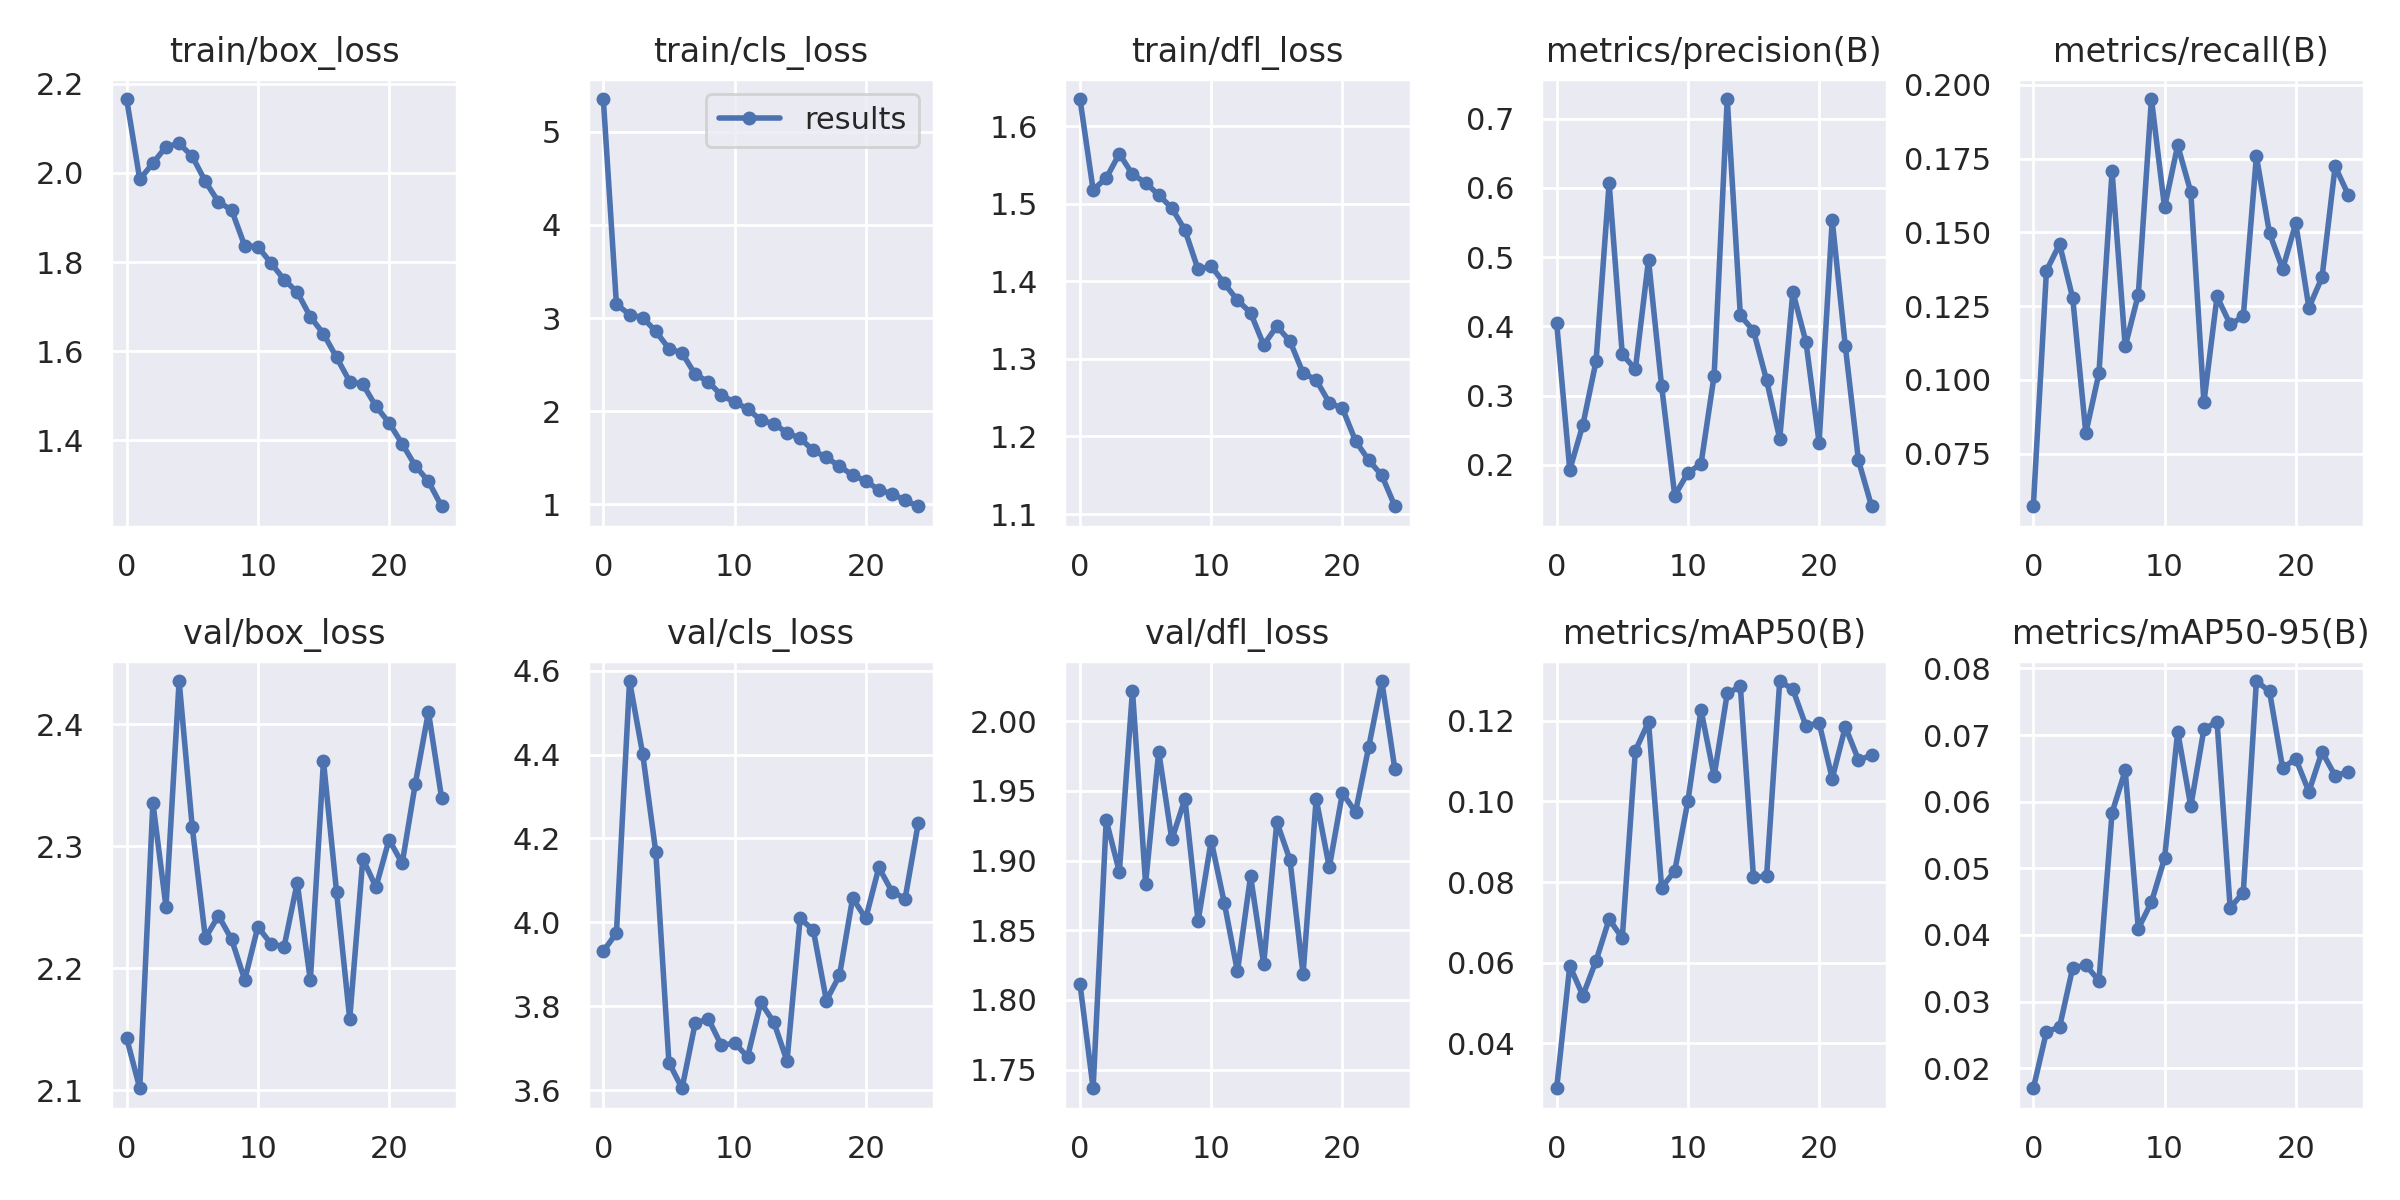

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


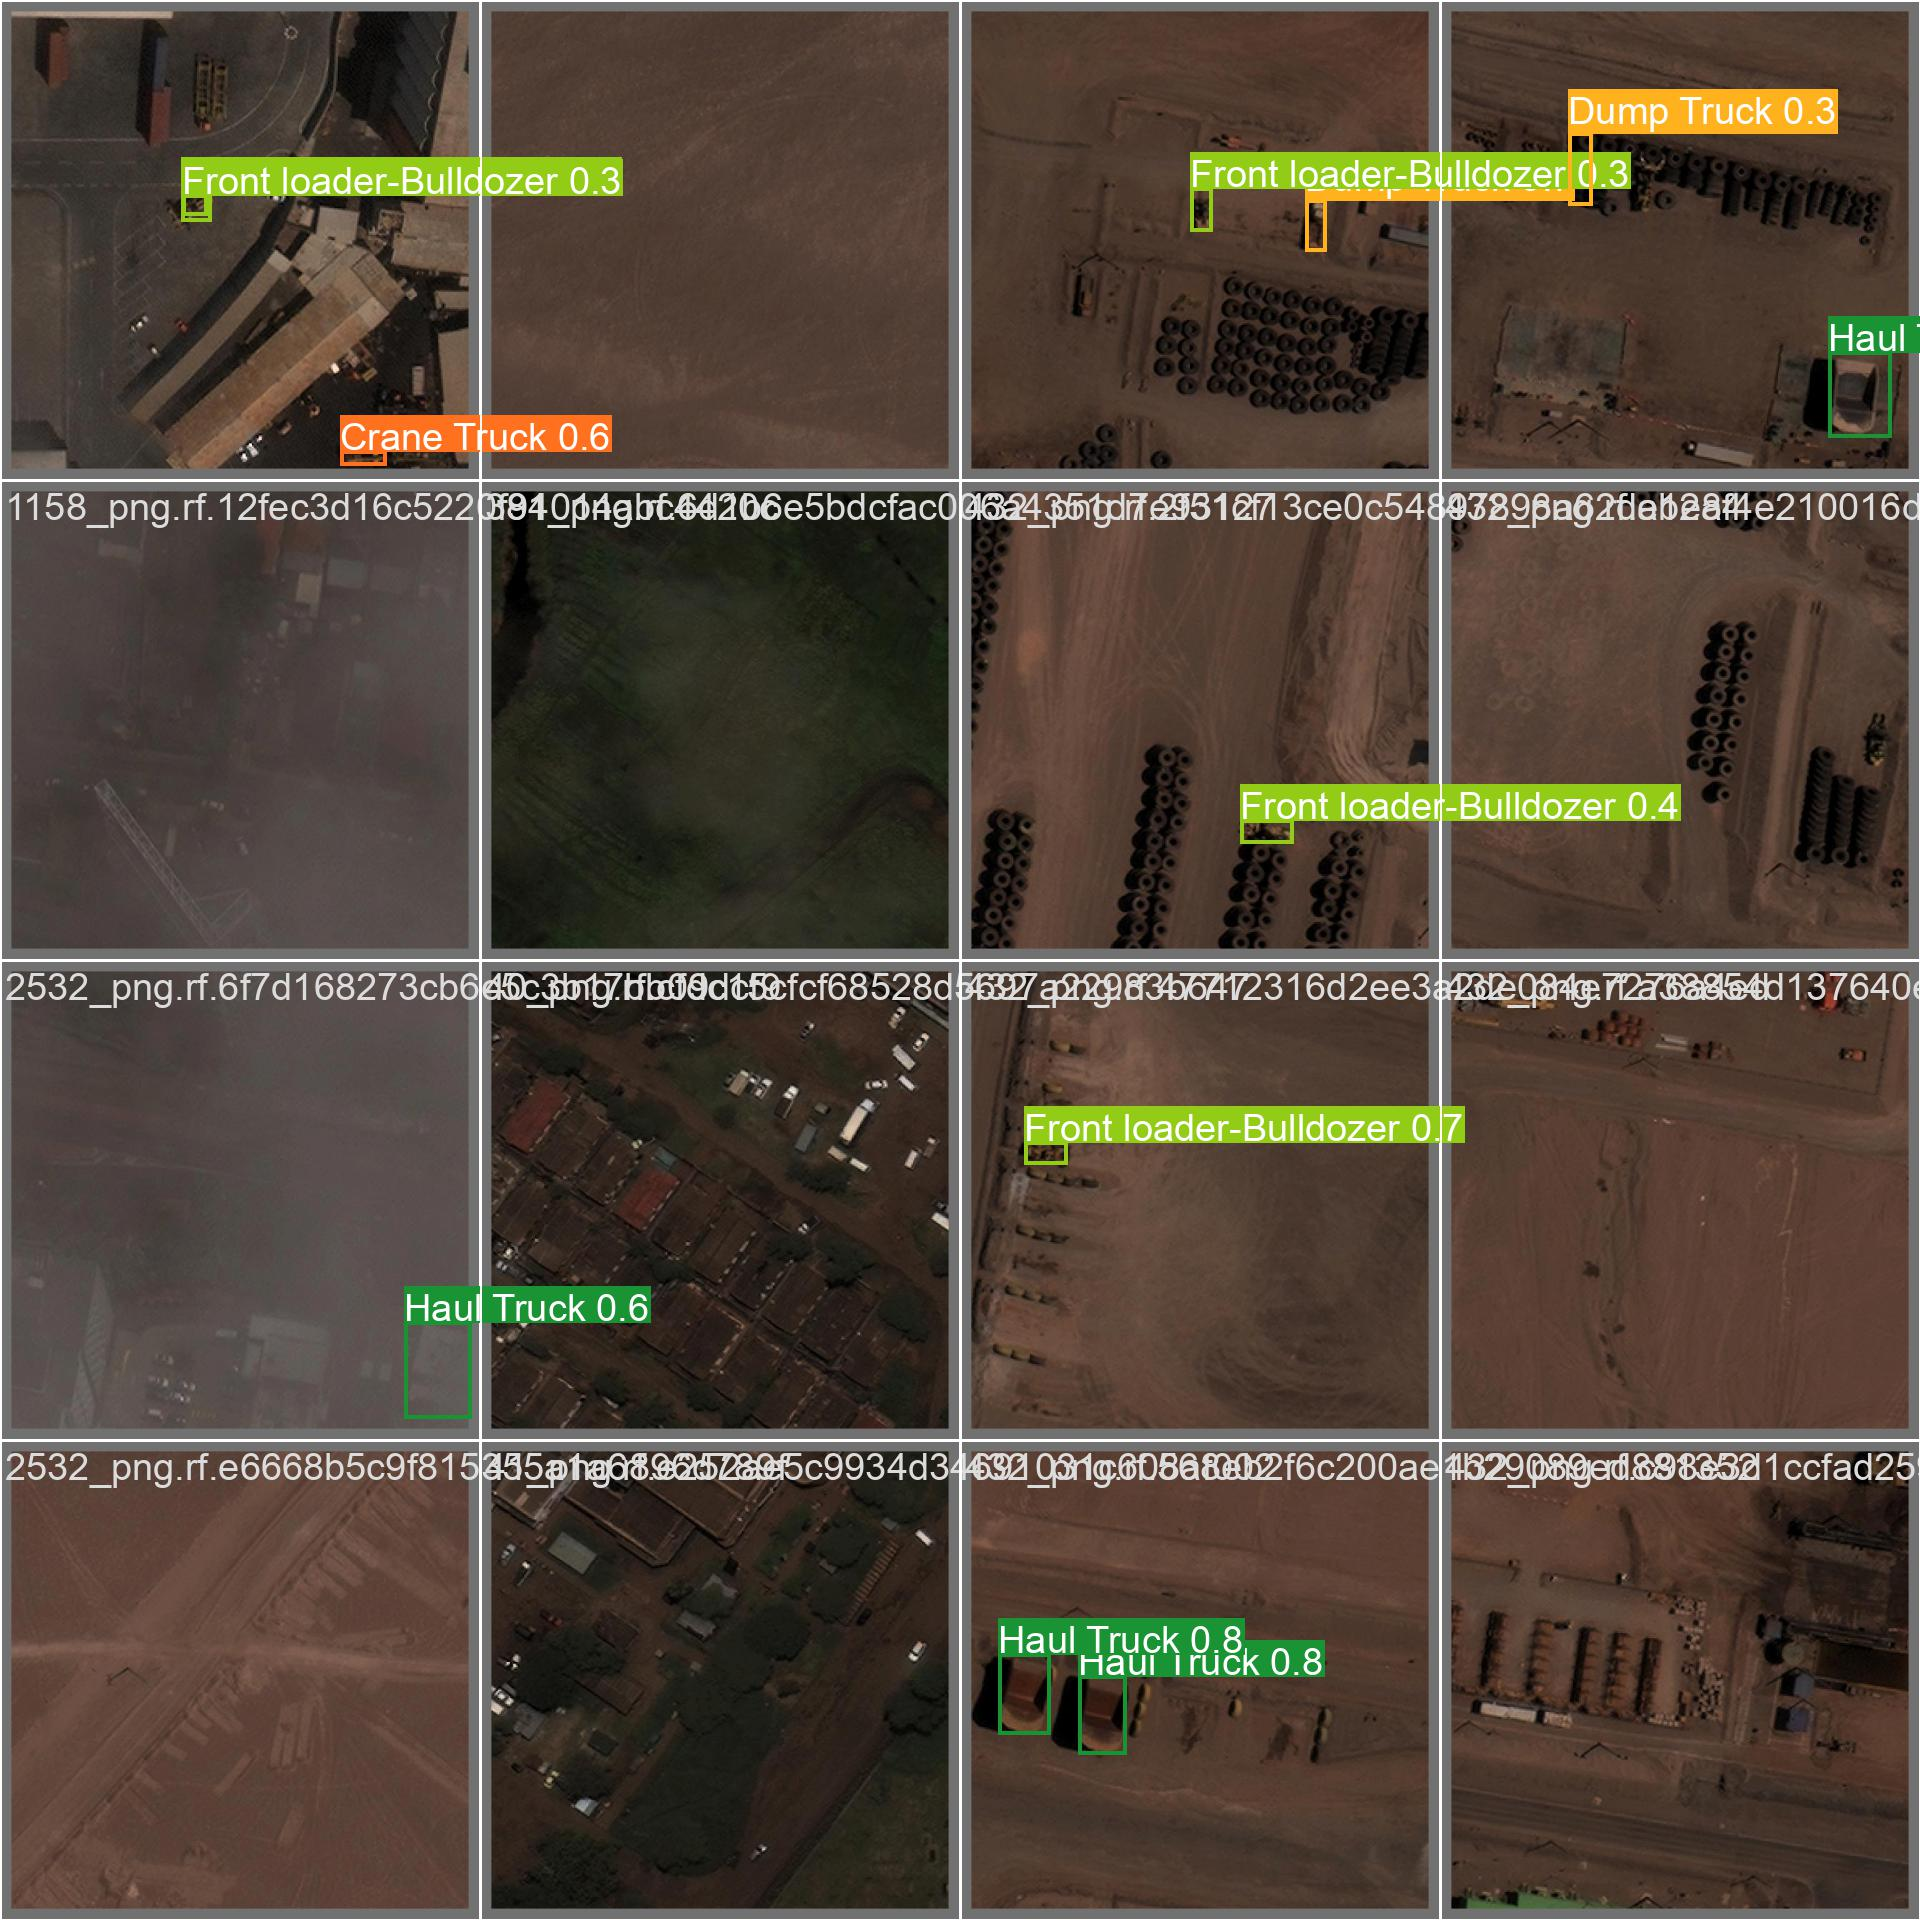

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
2023-07-23 22:50:47.638620: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-23 22:50:48.518447: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131002 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/-NRMM-3/valid/labels.cache... 199 images, 27 backgrounds, 0 corrupt: 100% 199/199 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:04<00:00,  2.81it/s]
                   all        199        370      0.238      0.176       0.13     0.0781
          Cement Mixer        199          

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-07-23 22:52:13.463821: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-23 22:52:14.295005: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131002 parameters, 0 gradients, 28.5 GFLOPs
image 1/161 /content/-NRMM-3/test/images/1063_png.rf.d0ab40a638137b53111249a7487280a8.jpg: 640x640 16.3ms
image 2/161 /content/-NRMM-3/test/images/1063_png.rf.e4507f1e5062c2b37ae1f05bec3b701a.jpg: 640x640 1 Dump Truck, 16.3ms
image 3/161 /content/-NRMM-3/test/images/118_png.rf.1f07ea2a82fa11f0b8970736f011190b.jpg: 640x640 16.4ms
image 4/161 /content/-NRMM-3/test/images/118_png.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:100]:
      display(Image(filename=image_path, width=600))
      print("\n")

##Modification Trials

In [ ]:
!yolo task=detect mode=train model=yolov8n-p6.pt data={dataset.location}/data.yaml epochs=25 imgsz=640  mask_ratio=1 plots=True

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 230, in entrypoint
    model = YOLO(model)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 60, in __init__
    {'.pt': self._load, '.yaml': self._new}[suffix](model)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/model.py", line 90, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 384, in attempt_load_one_weight
    ckpt = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 332, in torch_safe_load
    return torch.load(file, map_location='cpu')  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 791, in load
    with _open_file_lik

/content


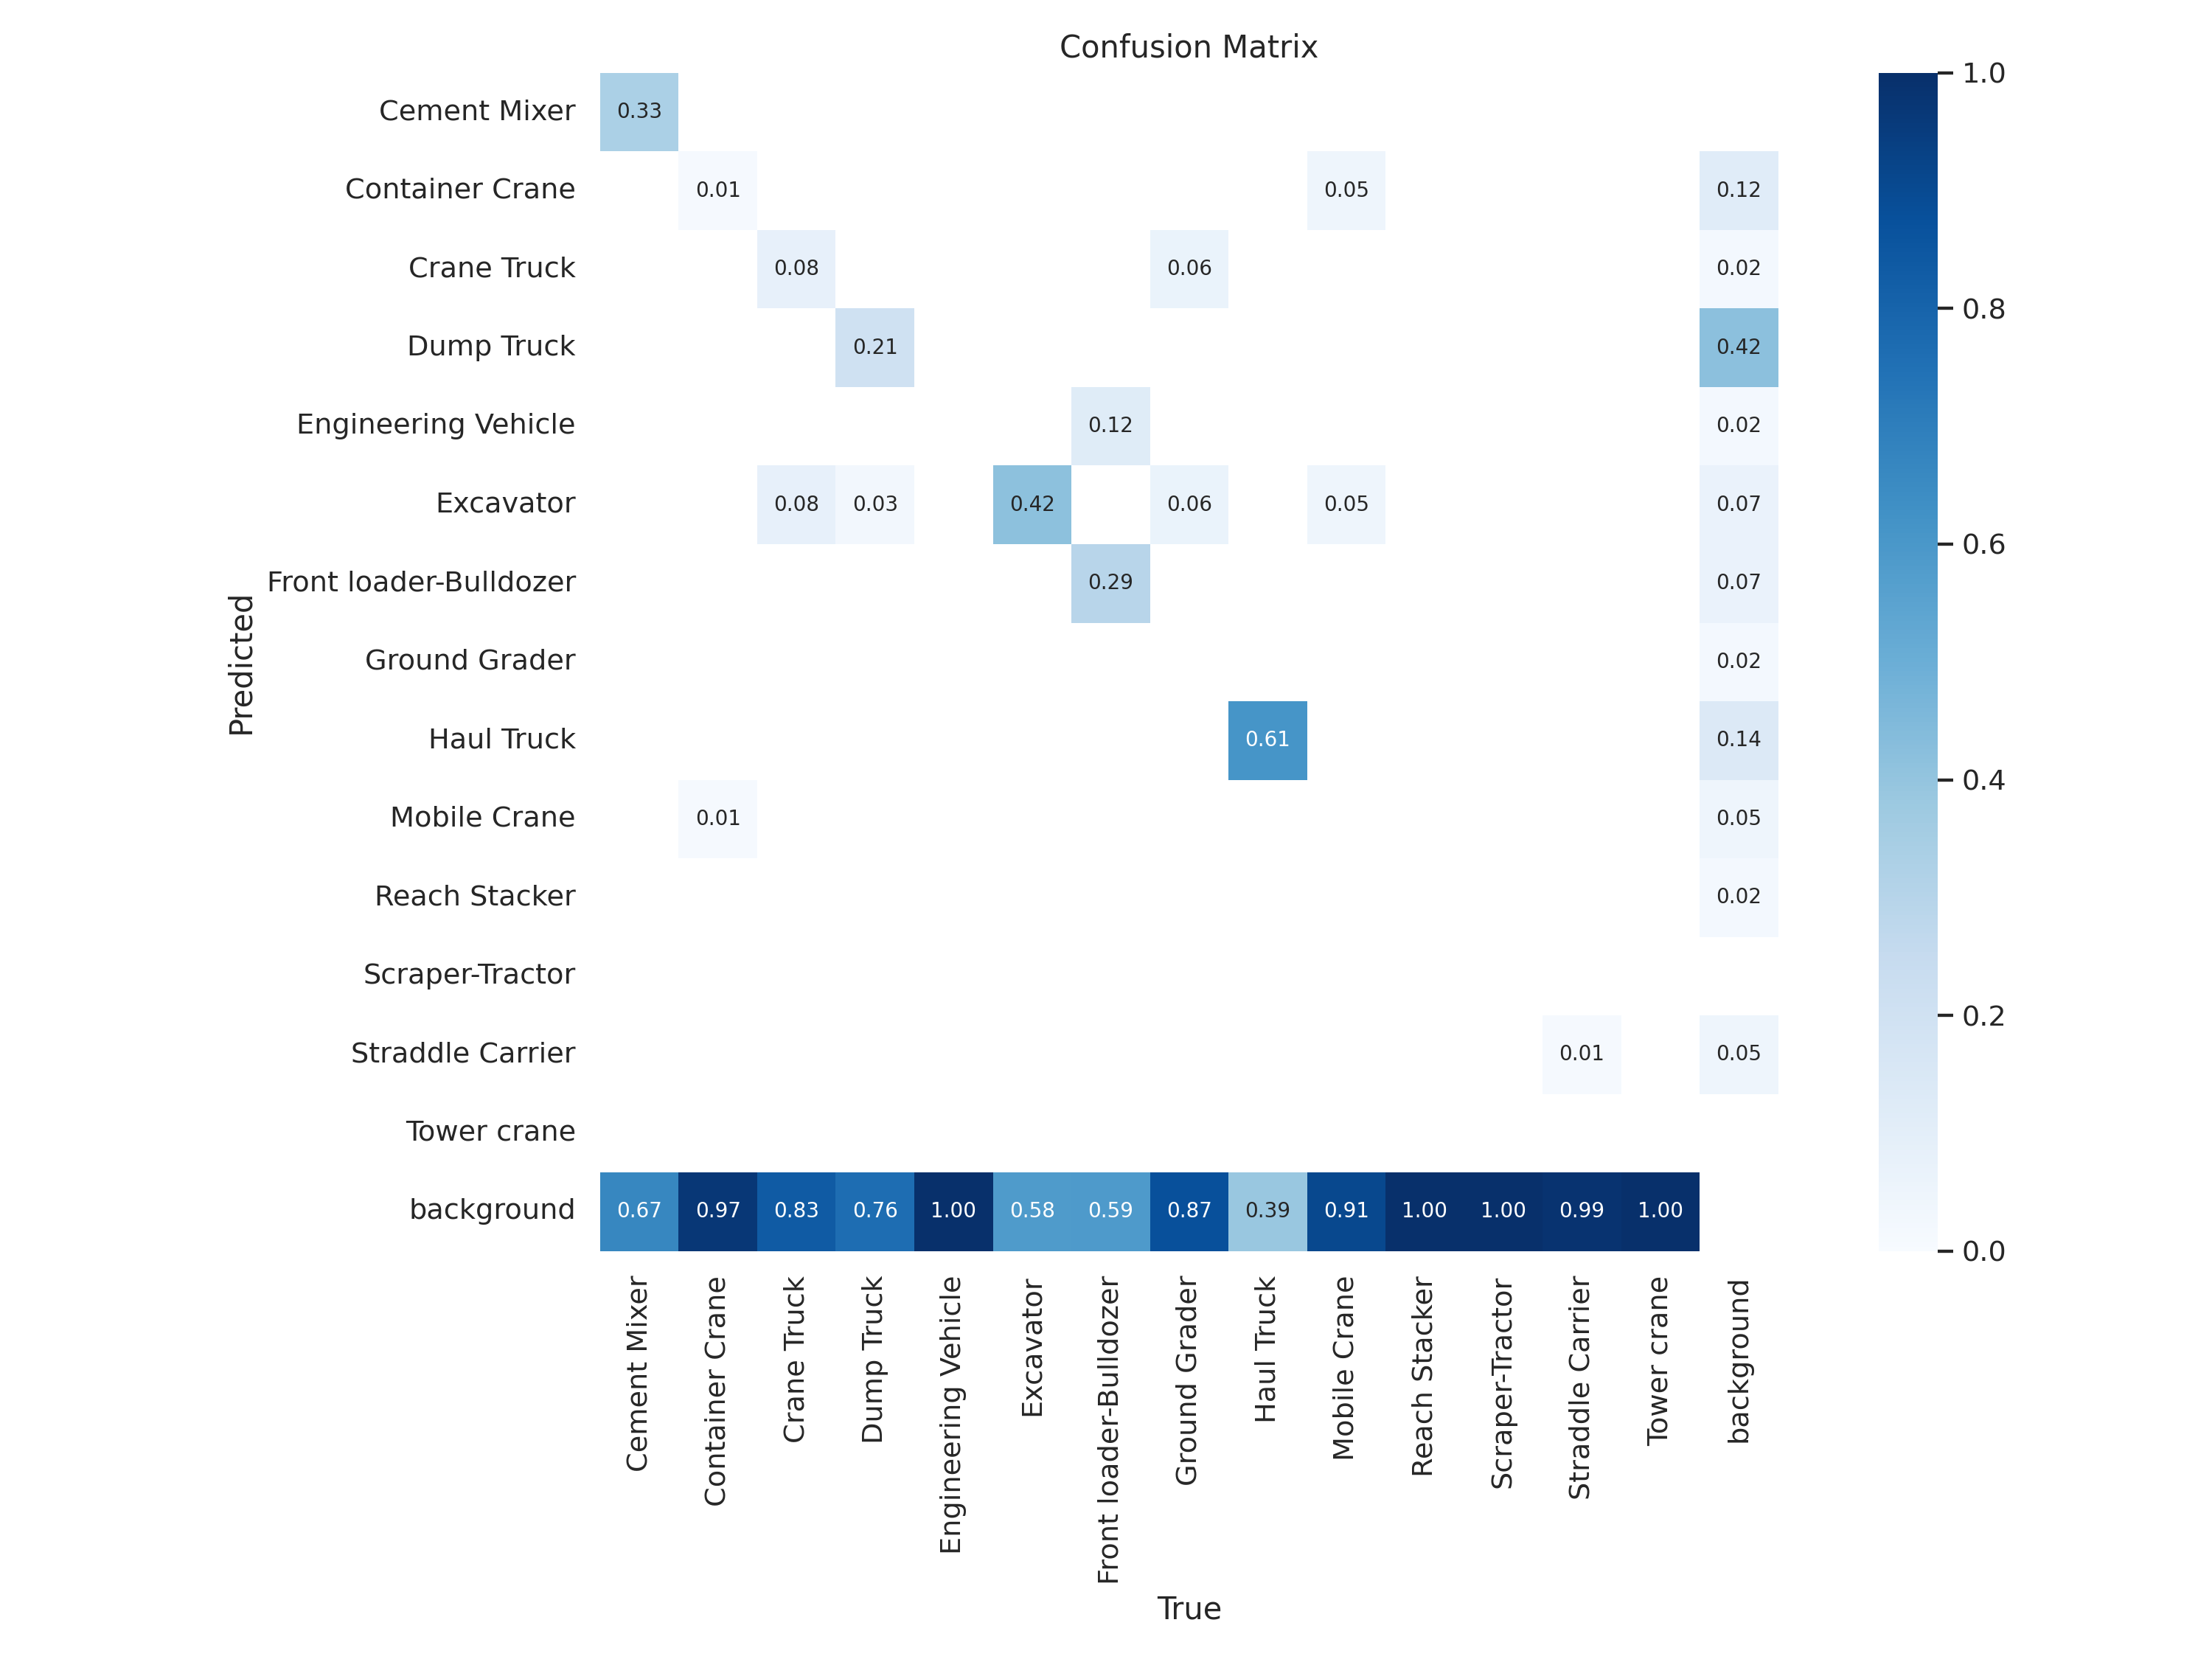

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

/content


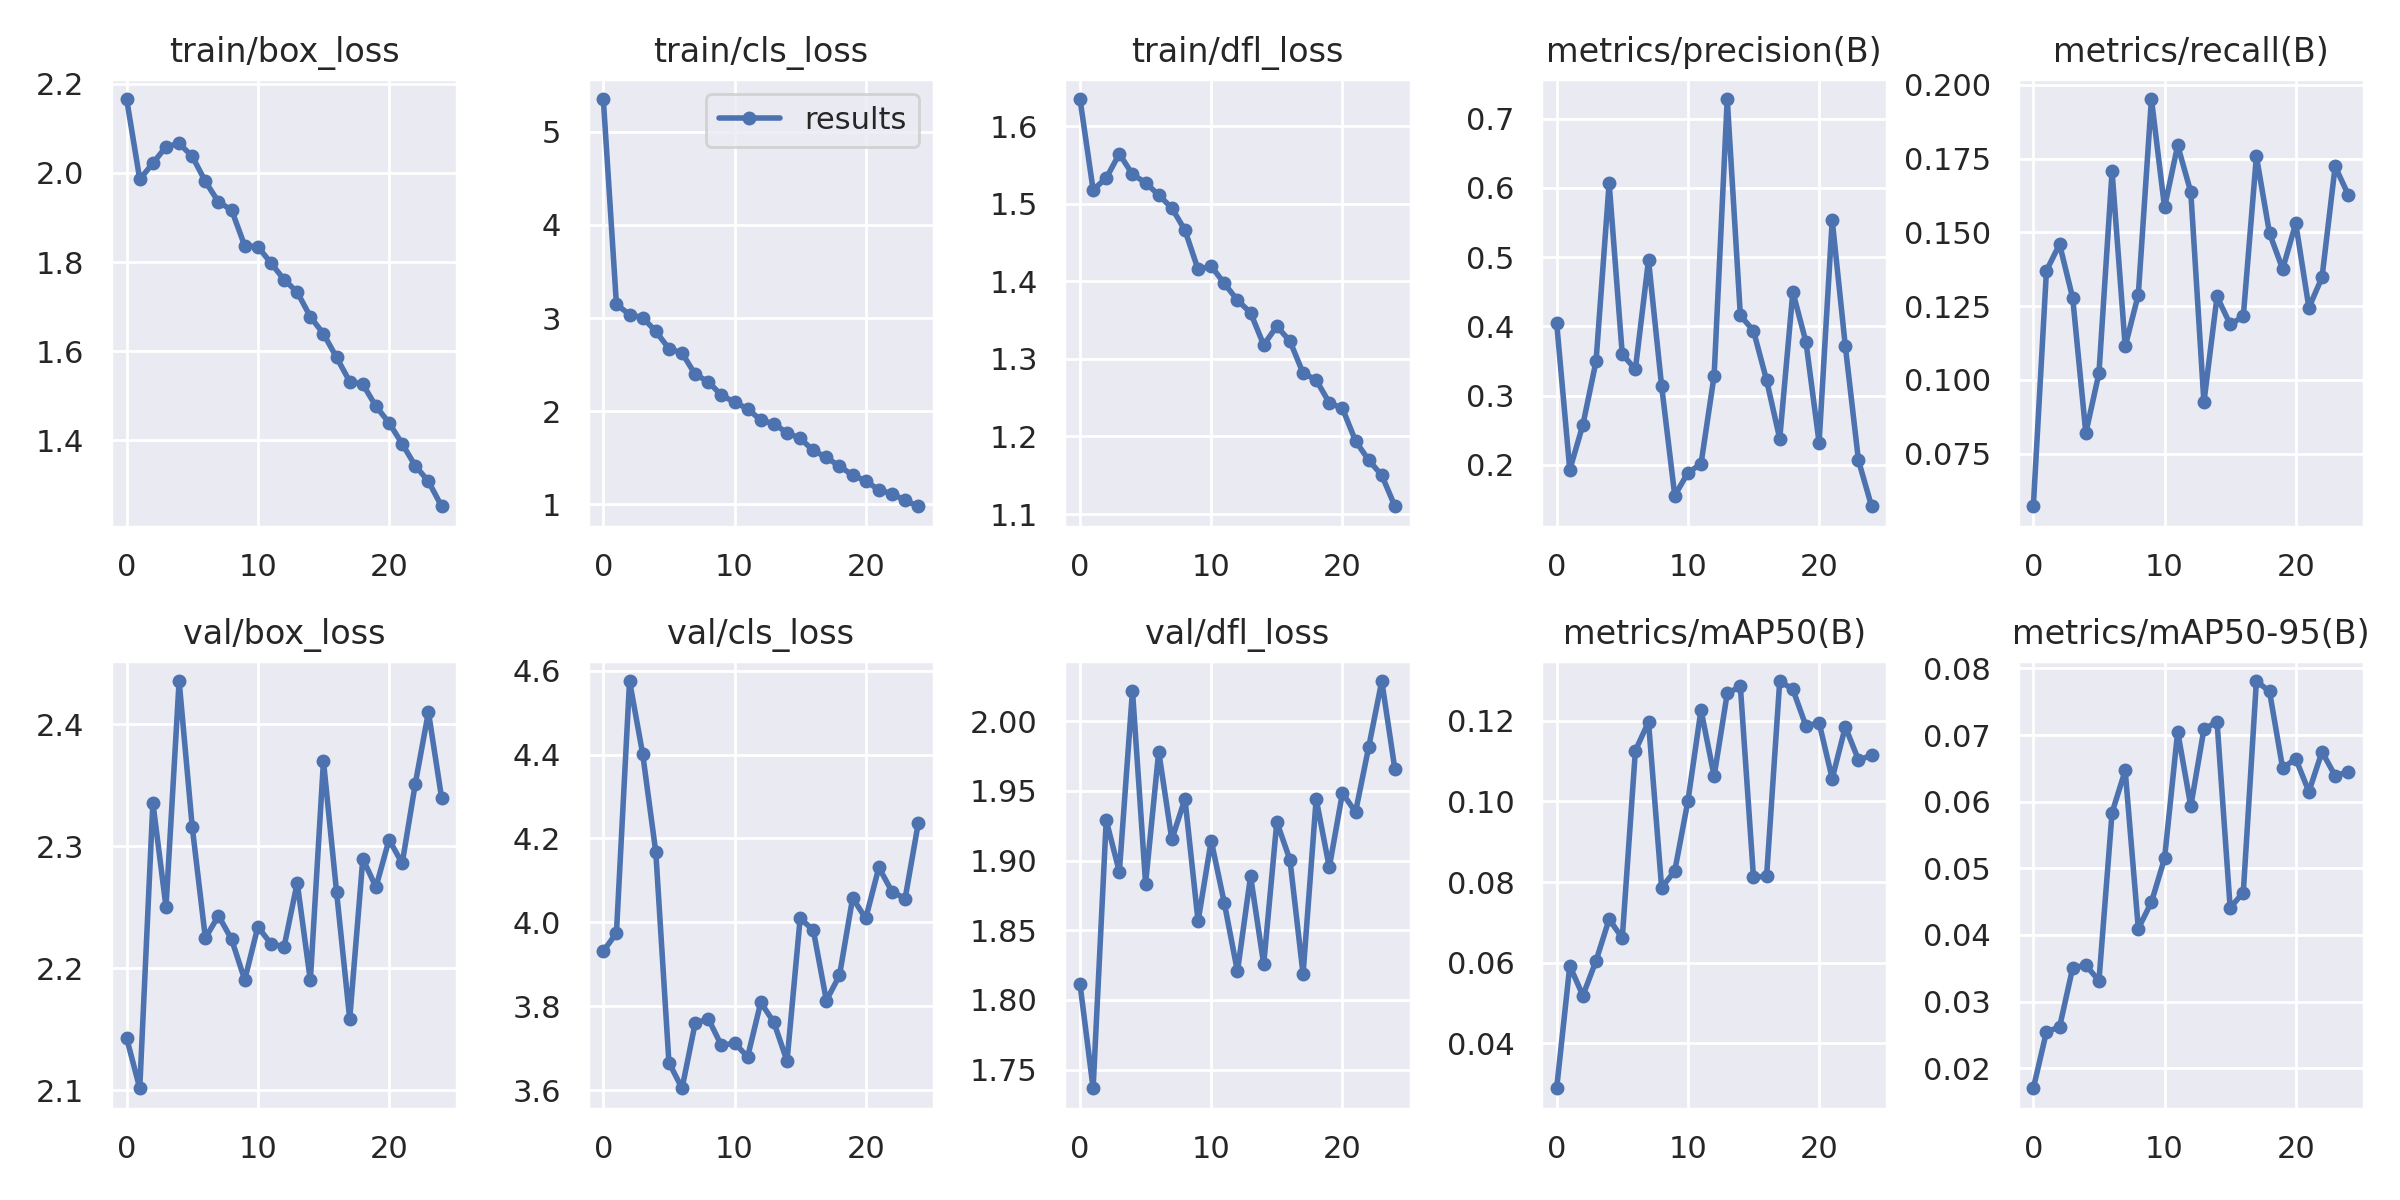

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

/content


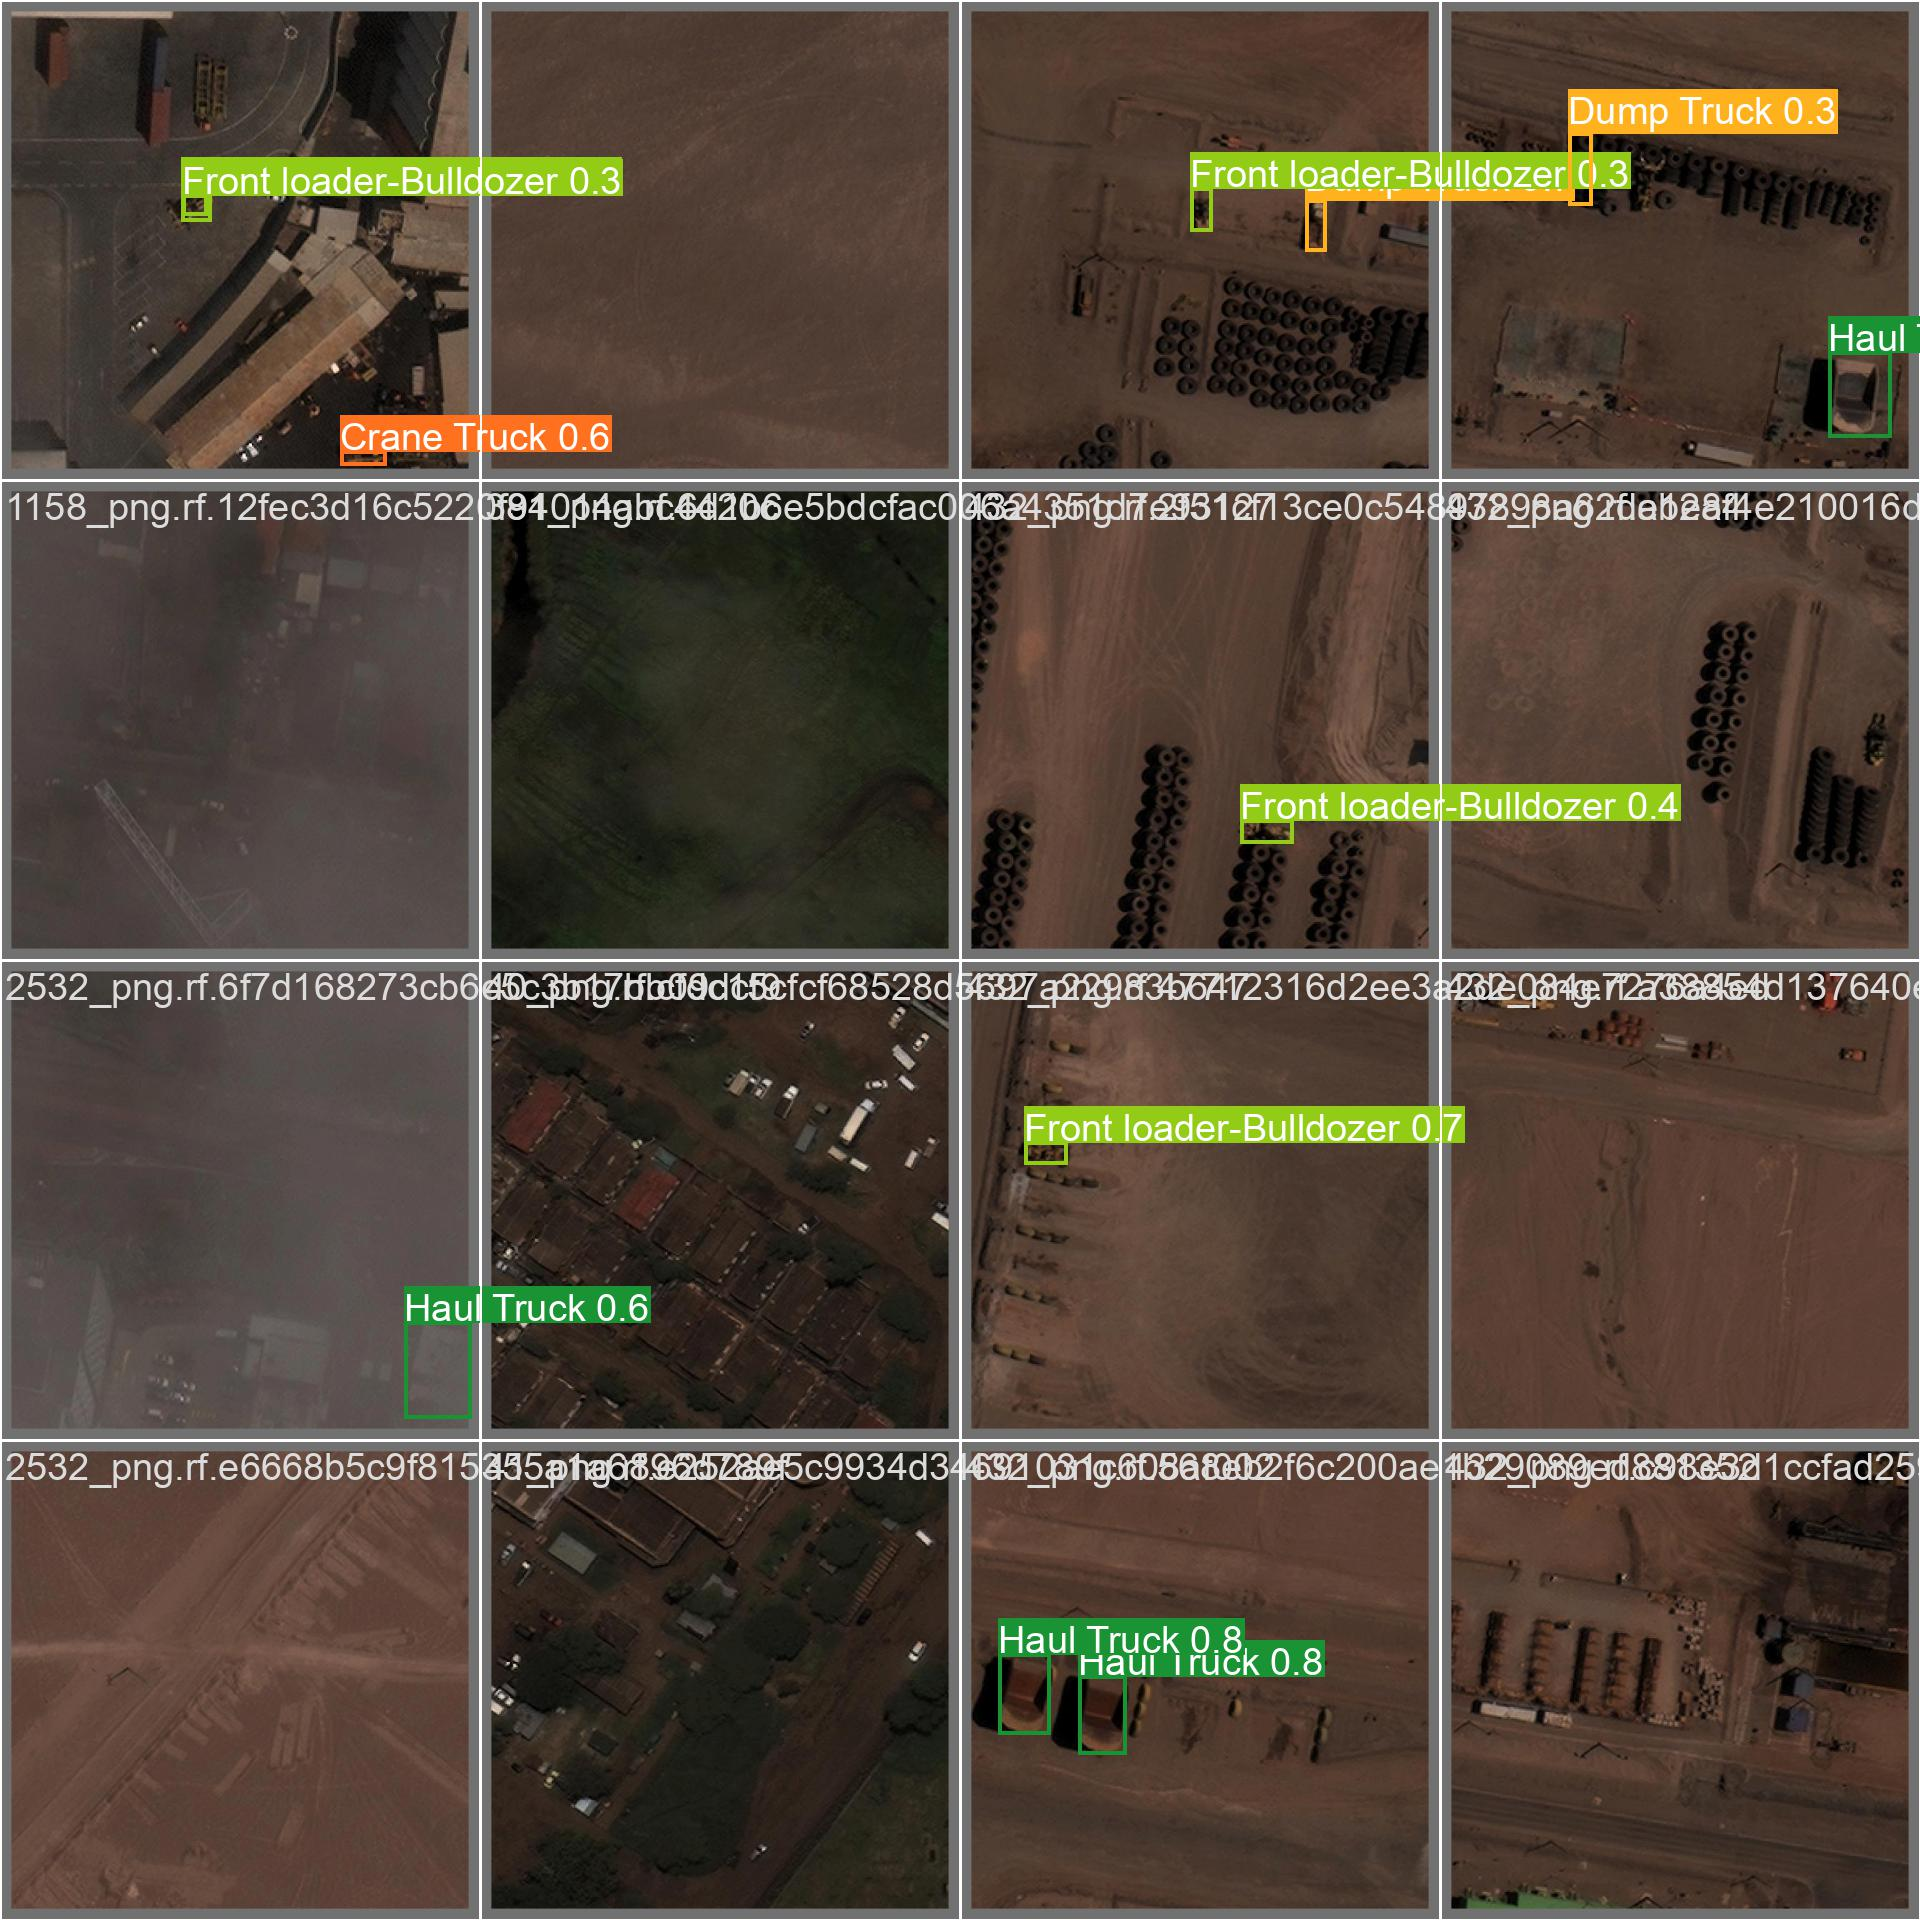

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131002 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/-NRMM-3/valid/labels.cache... 199 images, 27 backgrounds, 0 corrupt: 100% 199/199 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:04<00:00,  2.76it/s]
                   all        199        370      0.238      0.176       0.13     0.0781
          Cement Mixer        199          3       0.48      0.667      0.502      0.351
       Container Crane        199         72     0.0419     0.0139     0.0187    0.00742
           Crane Truck        199         12      0.329      0.167      0.129     0.0562
            Dump Truck        199         68       0.23      0.279      0.158     0.0847
   Engineering Vehicle        199         15          0          0     0.0149    0.00496
             Excavator        199         

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131002 parameters, 0 gradients, 28.5 GFLOPs
image 1/161 /content/-NRMM-3/test/images/1063_png.rf.d0ab40a638137b53111249a7487280a8.jpg: 640x640 16.3ms
image 2/161 /content/-NRMM-3/test/images/1063_png.rf.e4507f1e5062c2b37ae1f05bec3b701a.jpg: 640x640 1 Dump Truck, 16.3ms
image 3/161 /content/-NRMM-3/test/images/118_png.rf.1f07ea2a82fa11f0b8970736f011190b.jpg: 640x640 16.4ms
image 4/161 /content/-NRMM-3/test/images/118_png.rf.724c386fc53ba9d0e0497012f3b49e7d.jpg: 640x640 16.3ms
image 5/161 /content/-NRMM-3/test/images/118_png.rf.8325ac33ed885e51e9b6fc07ce0f1c2c.jpg: 640x640 16.3ms
image 6/161 /content/-NRMM-3/test/images/118_png.rf.dd6c5f59074f1b045b39ba2242dc70f0.jpg: 640x640 1 Dump Truck, 16.3ms
image 7/161 /content/-NRMM-3/test/images/131_png.rf.36f88d512a0dc5ab588143e24e85e7c3.jpg: 640x640 3 Dump Trucks, 16.3ms
image 8/161 /content/-NRMM-3/test/images/131

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:100]:
      display(Image(filename=image_path, width=600))
      print("\n")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from ultralytics.models.yolo.detect import DetectionTrainer

From the mAP, the preprocess use for v3 notebook is better than v2. Also for the same batch of testing images, model in this notebook are more sensible for our NRMM.

##4. Hyper-parameters tuning

In [ ]:
# Install and update Ultralytics and Ray Tune pacakges
!pip install -U ultralytics 'ray[tune]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 36.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.20
    Uninstalling ultralytics-8.0.20:
      Successfully uninstalled ultralytics-8.0.20


In [ ]:
from ultralytics import YOLO
from ray import tune

model = YOLO("/content/runs/detect/train2/weights/best.pt")
result_grid = model.tune(data="/content/-NRMM-3/data.yaml", epochs=25)

Output hidden; open in https://colab.research.google.com to view.